In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from datetime import datetime, timedelta
from glob import glob
import os

plt.style.use('seaborn-v0_8-whitegrid')

## 1. Load Processed ApRES Data

The raw FMCW radar data has been processed using MATLAB scripts (in `proc/apres/`) to extract the range to the ice bed over time.

In [2]:
# Load the processed data
apres = sio.loadmat('../data/apres/rangeOverTime.mat')

# Extract variables
range_m = apres['range'].flatten()  # Range to bed in meters
time_days = apres['timeInDays'].flatten()  # Days since Jan 1, 2019

# Convert to dates
start_date = datetime(2019, 1, 1)
dates = [start_date + timedelta(days=float(d)) for d in time_days]

# Calculate change relative to first measurement
range_change_mm = (range_m - range_m[0]) * 1000

print(f"ApRES Measurements: {len(range_m)}")
print(f"Period: {dates[0].strftime('%Y-%m-%d')} to {dates[-1].strftime('%Y-%m-%d')}")
print(f"Duration: {(dates[-1] - dates[0]).days} days")

ApRES Measurements: 181
Period: 2019-02-17 to 2019-11-25
Duration: 281 days


## 2. Ice Thickness Change Over Time

The range to the ice bed changed by over 1 meter during the monitoring period!

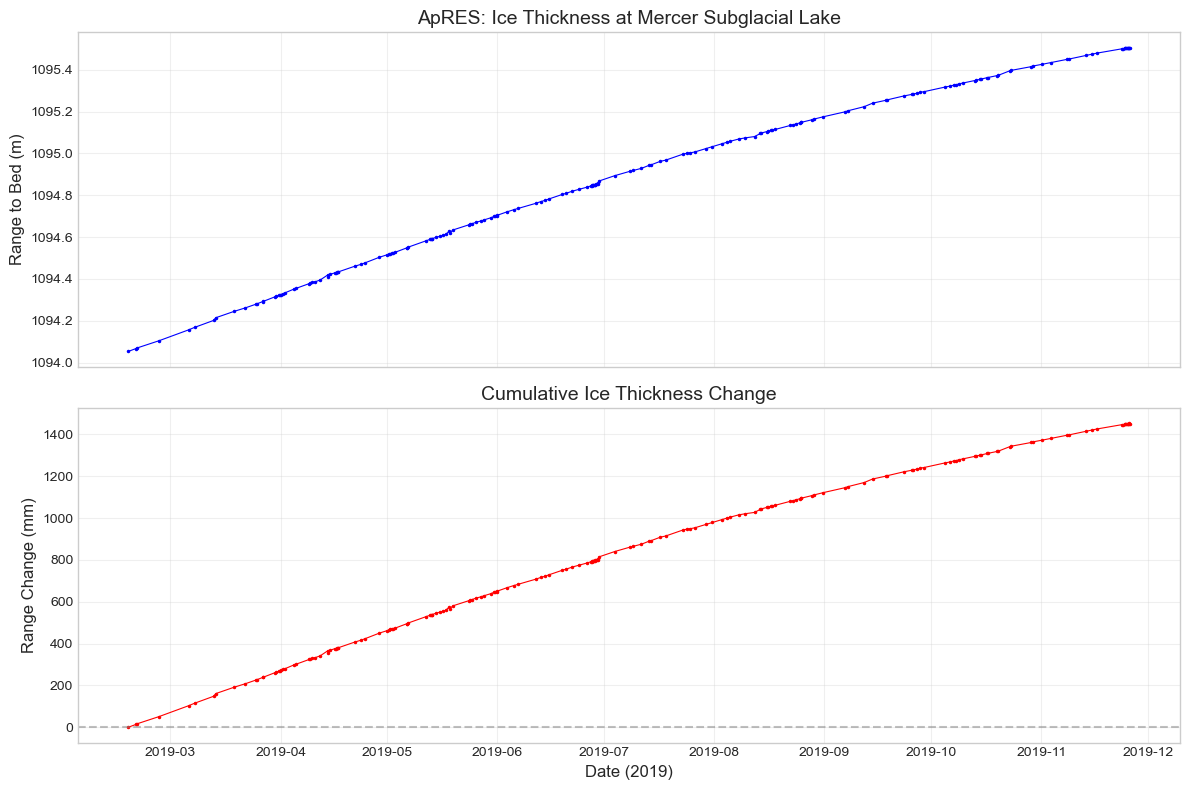


Total change: 1451.4 mm (1.451 m)


In [3]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Absolute range
axes[0].plot(dates, range_m, 'b.-', markersize=3, linewidth=0.8)
axes[0].set_ylabel('Range to Bed (m)', fontsize=12)
axes[0].set_title('ApRES: Ice Thickness at Mercer Subglacial Lake', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Range change in mm
axes[1].plot(dates, range_change_mm, 'r.-', markersize=3, linewidth=0.8)
axes[1].axhline(0, color='gray', linestyle='--', alpha=0.5)
axes[1].set_xlabel('Date (2019)', fontsize=12)
axes[1].set_ylabel('Range Change (mm)', fontsize=12)
axes[1].set_title('Cumulative Ice Thickness Change', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTotal change: {range_change_mm[-1]:.1f} mm ({range_m[-1] - range_m[0]:.3f} m)")

## 3. Rate of Thickness Change

In [4]:
# Calculate rate of change
total_days = (dates[-1] - dates[0]).days
rate_mm_yr = range_change_mm[-1] / total_days * 365

print(f"=== Rate Analysis ===")
print(f"Total change: {range_change_mm[-1]:.1f} mm over {total_days} days")
print(f"Average rate: {rate_mm_yr:.1f} mm/yr")
print(f"\nThis represents ice thickening (positive = range to bed increased)")

=== Rate Analysis ===
Total change: 1451.4 mm over 281 days
Average rate: 1885.3 mm/yr

This represents ice thickening (positive = range to bed increased)


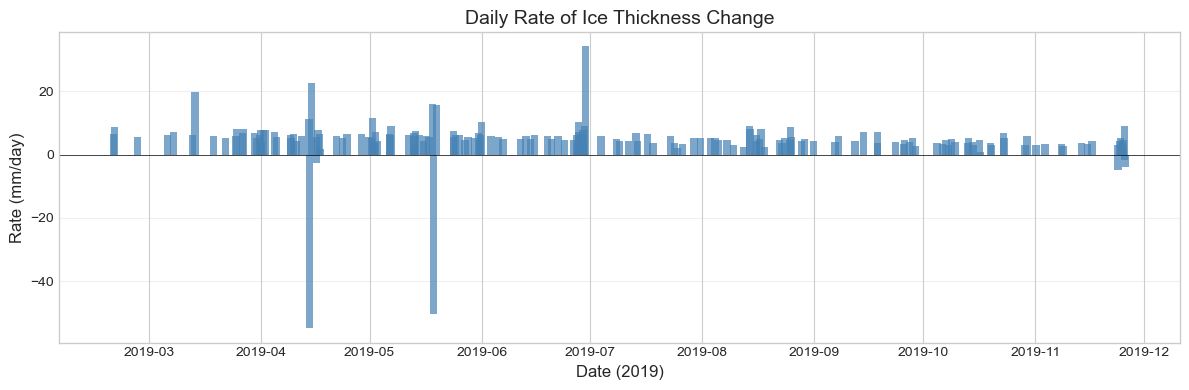

Mean daily rate: 4.91 mm/day
Max daily rate: 34.17 mm/day


In [5]:
# Compute daily rate of change
dt = np.diff(time_days)  # Time intervals in days
dr = np.diff(range_change_mm)  # Range change between measurements
daily_rate = dr / dt  # mm/day

fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(dates[1:], daily_rate, width=2, alpha=0.7, color='steelblue')
ax.axhline(0, color='black', linewidth=0.5)
ax.set_xlabel('Date (2019)', fontsize=12)
ax.set_ylabel('Rate (mm/day)', fontsize=12)
ax.set_title('Daily Rate of Ice Thickness Change', fontsize=14)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"Mean daily rate: {np.mean(daily_rate):.2f} mm/day")
print(f"Max daily rate: {np.max(daily_rate):.2f} mm/day")

## 4. Raw Data Files Overview

The raw ApRES data consists of binary `.DAT` files, each containing one measurement.

In [6]:
# Count raw files
raw_files = sorted(glob('../data/apres/raw/DATA*.DAT'))
print(f"Raw ApRES files: {len(raw_files)}")

# Parse dates from filenames
def parse_filename(f):
    name = os.path.basename(f).replace('DATA', '').replace('.DAT', '')
    parts = name.split('-')
    return datetime(int(parts[0]), int(parts[1]), int(parts[2]), 
                   int(parts[3][:2]), int(parts[3][2:]))

raw_dates = [parse_filename(f) for f in raw_files]

print(f"Date range: {raw_dates[0]} to {raw_dates[-1]}")
print(f"\nSampling: Every ~4 hours")

Raw ApRES files: 1878
Date range: 2019-01-18 02:31:00 to 2019-11-25 23:02:00

Sampling: Every ~4 hours


## 5. Summary

The ApRES data shows that the ice thickness above Mercer Subglacial Lake **increased by ~1.5 m** over 10 months. This could be due to:

1. **Surface accumulation** - Snow added at the surface
2. **Reduced basal melting** - Less melting at the ice-lake interface
3. **Lake level drop** - If the lake drained, the ice-water interface would move down

This data complements the GPS and satellite altimetry measurements to understand the lake's behavior.

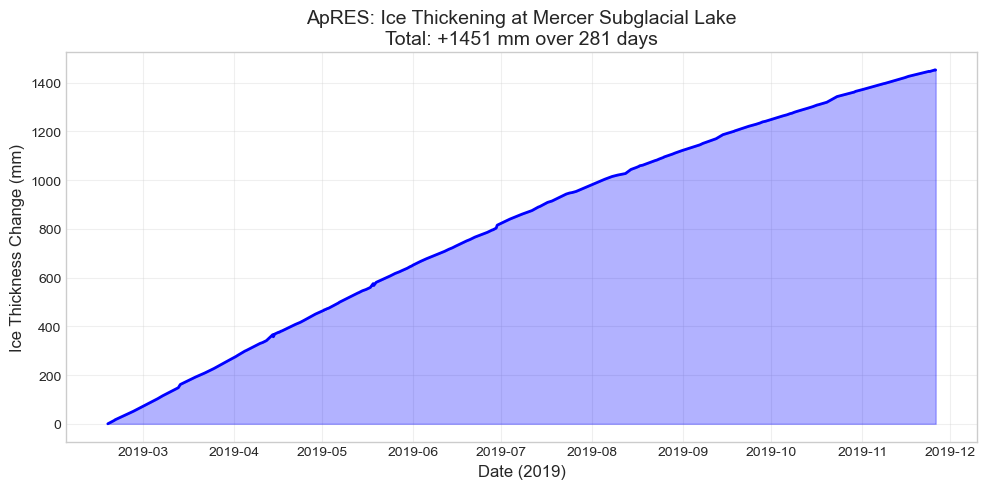

In [7]:
# Final summary figure
fig, ax = plt.subplots(figsize=(10, 5))

ax.fill_between(dates, 0, range_change_mm, alpha=0.3, color='blue')
ax.plot(dates, range_change_mm, 'b-', linewidth=2)

ax.set_xlabel('Date (2019)', fontsize=12)
ax.set_ylabel('Ice Thickness Change (mm)', fontsize=12)
ax.set_title('ApRES: Ice Thickening at Mercer Subglacial Lake\n'
             f'Total: +{range_change_mm[-1]:.0f} mm over {total_days} days', fontsize=14)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()